# Animation from GIBS
### Writen by Yibo Jiang

In [27]:
from io import BytesIO
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from PIL import Image as plimg
import numpy as np
from scipy import ndimage

import matplotlib.image as mpimg
from IPython.display import Image, display
from IPython.display import Video

import vis_utils as vu

## Setup Figure Object

In [22]:
# setup figure object
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (16, 9)

## Iterate the time to create frame per day

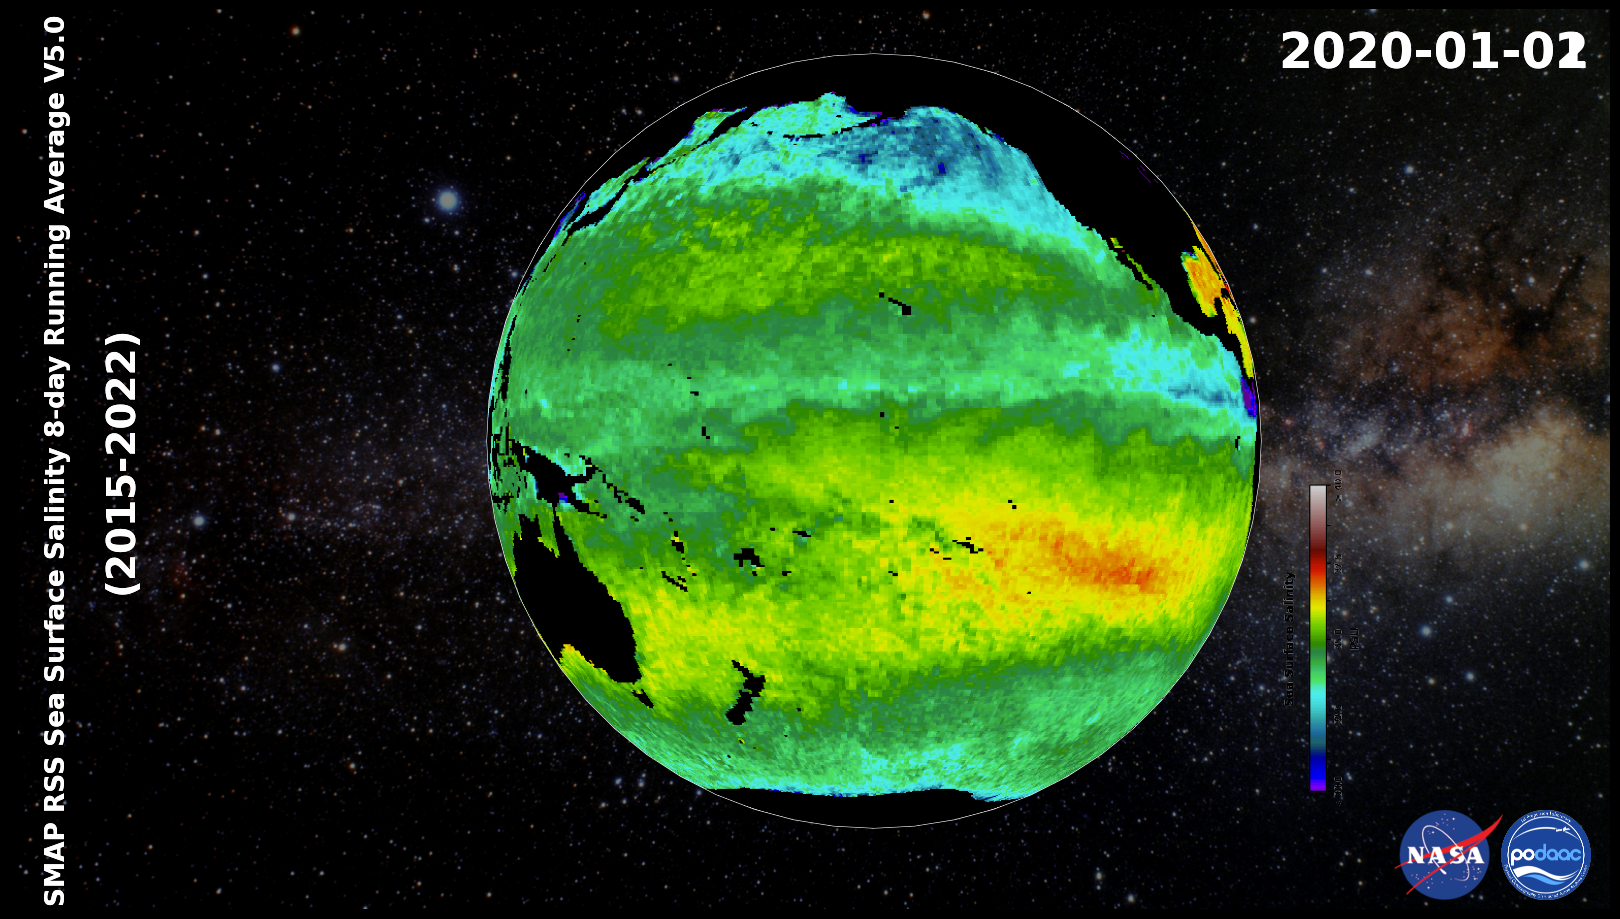

In [32]:
# read each data file in the list
nf = 0
cur_lon = -160.0
londel = -0.25

for k in range(2020, 2021):
 for jm in range(1, 13):
  for id in range(1, 32):

    vu.setup_bg()

    cur_lon = cur_lon + londel
    if cur_lon < -180.0:
       cur_lon = cur_lon + 360.0

    # Construct global image URL.
    img_bm = vu.get_gibs_wms_raw_image("BlueMarble_NextGeneration", str(k)+"-"+ "{0:0>2}".format(jm) +"-"+ "{0:0>2}".format(id) ) 
    img = vu.get_gibs_wms_raw_image("SMAP_L3_Sea_Surface_Salinity_REMSS_8Day_RunningMean", str(k)+"-"+ "{0:0>2}".format(jm) +"-"+ "{0:0>2}".format(id) ) 

    ax = plt.axes([0.10, 0.09, 0.88, 0.86], projection=ccrs.Orthographic(central_longitude=cur_lon))
    ax.set_global()
    img_extent = (-180, 180, -90, 90)

    ax.imshow(img_bm, transform = ccrs.PlateCarree(), extent = (-180,180,-90,90), origin = 'upper',zorder=1)
    ax.imshow(img, transform = ccrs.PlateCarree(), extent = (-180,180,-90,90), origin = 'upper',zorder=10)

    legendImg = vu.get_gibs_colorbar_img("SMAP_L3_Sea_Surface_Salinity_REMSS_8Day_RunningMean")
    ax_cb = plt.axes([0.62,0.10,0.4,0.4],zorder=100)
    ax_cb.set_facecolor("white")
    ax_cb.set_axis_off()
    ax_cb.imshow(ndimage.rotate(legendImg, 90))

    vu.setup_caption(str(k)+"-"+ "{0:0>2}".format(jm) +"-"+ "{0:0>2}".format(id))
    vu.setup_logo()

    nf = nf + 1
      
    plt.subplots_adjust(left=0.0, right=0.99, top=0.99, bottom=0.01, hspace = 0.15, wspace=0.0)

    #print("---Generating frame "+str(nf))
    plt.savefig("./anim_plots/plot{0}".format(str(nf).rjust(4, "0")), dpi = 300)

    Image("./anim_plots/plot{0}".format(str(nf).rjust(4, "0"))+".png", width=800)



## Use ffmpeg command to generate the mp4 file from all the frames just c

In [25]:
!~/Downloads/ffmpeg -framerate 10 -i anim_plots/plot%04d.png -c:v libx264 -crf 10 -pix_fmt yuv420p -aspect 16:9 -s 1920x1080 output.mp4

ffmpeg version N-109934-g891ed24f77-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static

In [31]:
Video("output.mp4", width=800)